# LRU priručna memorija (Least Recently Used Cache)

Implementacija s dvije strukture:

1.  Red implementiran s dvostruko povezanom listom. Maksimalna veličina reda jednaka je veličini priručne memorije. Najčešće korištene stranice biti će bliže početku reda (*head*), a rjeđe korištene stranice bit će bliže kraju reda (*tail*). 

2. Hash mapa s brojem stranice kao ključem i adresom odgovarajućeg čvora odnosno zapisa u redu. 

Kada se neka stranica referira ona može biti prisutna u memoriji. Ako je u memoriji, čvor se premješta iz liste na početak reda. 

Ako tražena stranica nije u memoriji, onda se ona dodaje u priručnu memoriju, odnosno dodaje se novi čvor na početak reda i obnovi se odgovarajuća adresa u hash mapi. Ako je red pun (svi okviri su popunjeni), tada se iz priručne memorije izbacuje čvor koji se nalazi na kraju reda i dodaje se taj novi čvor na početak reda. 


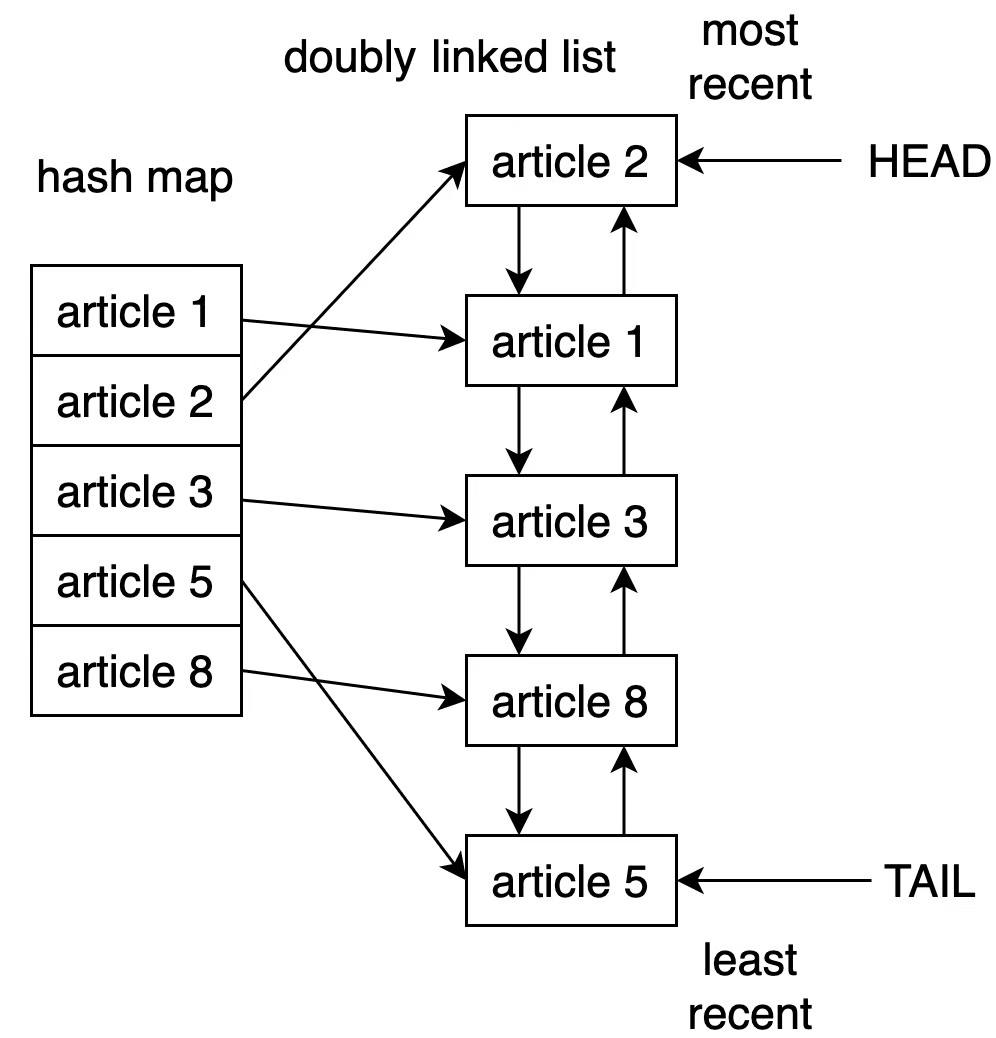


izvor: https://realpython.com/lru-cache-python/

## Zadatak

1. U primjeru za keširanje web stranica treba dodati još četiri web stranice i pozivati ih više puta naizmjenično metodom get_url() kao i ostale web stranice. 
2. Odrediti vrijeme izvođenja poziva web stranica bez keširanja.
3. Zatim isprobati pozive metode get_url() s keširanjem ali raditi promjene veličine priručne memorije (maxsize = 12, 10, 8, 6 i 4).
4. Izmjeriti vremena za svaki slučaj i komentirati kako veličina priručne memorije utječe na vrijeme izvršavanja. 

Primjeri pokretanja (izvor: https://medium.com/lambda-automotive/python-and-lru-cache-f812bbdcbb51)

In [9]:
import time
import urllib
import urllib.request
from functools import lru_cache

# Bez dekoratora *LRU cache* 

In [10]:
def get_url(resource):
    try:
        with urllib.request.urlopen(resource) as s:
            return True
    except Exception as e:
        return False
    
start = time.time()
get_url("https://cloud.google.com/")
get_url("https://aws.amazon.com/es/")
get_url("https://azure.microsoft.com/es-es/")
get_url("https://www.digitalocean.com/")
get_url("https://cloud.google.com/")
get_url("https://www.ovh.com/")
get_url("https://cloud.google.com/")
get_url("https://cloud.google.com/")
get_url("https://aws.amazon.com/es/")
get_url("https://azure.microsoft.com/es-es/")
get_url("https://aws.amazon.com/es/")
get_url("https://azure.microsoft.com/es-es/")
get_url("https://cloud.google.com/")
get_url("https://aws.amazon.com/es/")
get_url("https://aws.amazon.com/es/")
get_url("https://lms-2020.tvz.hr/")
get_url("https://www.youtube.com/")
get_url("https://github.com/")
get_url("https://moj.tvz.hr//")

print(f'Duration: {time.time() - start}s')


Duration: 6.204978942871094s


# S dekoratorom *LRU cache*

In [11]:
@lru_cache(maxsize=5)
def get_url(resource):
    try:
        with urllib.request.urlopen(resource) as s:
            return True
    except Exception as e:
        return False

start = time.time()
get_url("https://cloud.google.com/")
get_url("https://aws.amazon.com/es/")
get_url("https://azure.microsoft.com/es-es/")
get_url("https://www.digitalocean.com/")
get_url("https://cloud.google.com/")
get_url("https://www.ovh.com/")
get_url("https://cloud.google.com/")
get_url("https://cloud.google.com/")
get_url("https://aws.amazon.com/es/")
get_url("https://azure.microsoft.com/es-es/")
get_url("https://aws.amazon.com/es/")
get_url("https://azure.microsoft.com/es-es/")
get_url("https://cloud.google.com/")
get_url("https://aws.amazon.com/es/")
get_url("https://aws.amazon.com/es/")
get_url("https://lms-2020.tvz.hr/")
get_url("https://www.youtube.com/")
get_url("https://github.com/")
get_url("https://moj.tvz.hr//")

print(get_url.cache_info())
print(f'Duration: {time.time() - start}s')

CacheInfo(hits=10, misses=9, maxsize=5, currsize=5)
Duration: 2.4277091026306152s


# Rekurzivni pozivi bez dekoratora *LRU cache*

In [12]:
def fibonacci(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)
    
start = time.time()
print(fibonacci(40))
print(f'Duration: {time.time() - start}s')

165580141
Duration: 22.033248901367188s


# Rekurzivni pozivi sa dekoratorom *LRU cache*

In [13]:
@lru_cache(maxsize=5)
def fibonacci2(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fibonacci2(n - 1) + fibonacci2(n - 2)
    
start = time.time()
print(fibonacci2(40))
print(f'Duration: {time.time() - start}s')

165580141
Duration: 0.0s


# Rekurzivni pozivi s memoizacijom

In [14]:
def fibonacci3(n, memo={}):
    if n == 0 or n == 1:
        return 1
    else:
        if n in memo:
            return memo[n]
        else:
            memo[n] = fibonacci3(n - 1, memo) + fibonacci3(n - 2, memo)
            return memo[n]
    
start = time.time()
print(fibonacci3(40))
print(f'Duration: {time.time() - start}s')

165580141
Duration: 0.0s


# Implementacija *LRU cache* decoratora

In [15]:
def custom_lru(lru_size):
    def decorator(func):
        lru = {}
        def wrapper(n):
            nonlocal lru
            if n in lru:
                return lru[n]
            else:
                new_item = func(n)
                lru[n] = new_item
                if len(lru) > lru_size:
                    lru.popitem()
                    lru = {n: new_item, **lru}
                return lru[n]
        return wrapper
    return decorator

@custom_lru(lru_size=3)
def fibonacci4(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fibonacci4(n - 1) + fibonacci4(n - 2)

start = time.time() 
print(fibonacci4(40))
print(f'Duration: {time.time() - start}s')

165580141
Duration: 0.0s
